In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data_power = {
    '0':0,
    '1':2,
    '.':1,
    '#':5
}

def read_data(filename):    
    with open('data/'+filename) as f:
        lines = f.readlines()
        lines = map(lambda x:x.strip() , lines)
        lines = list(lines)
        data = map(lambda x:x.split() ,lines)
        data = list(data)
        data = np.array(data,dtype=list)
        
        return data[:,1].reshape(data.shape[0],1)

In [14]:
def plot_data(X,Y):
    plt.scatter(X,Y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def plot_learning_curve(J):
    
    plt.plot(np.arange(len(J)),J,label='Cost')
    plt.xlabel('Iterations times')
    plt.ylabel('Cost')
    plt.legend(loc='upper right')
    
    plt.show()
    
def plot_3d(X,Y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    color = np.random.randn(200)
    for index,y in enumerate(Y):
        if y == -1:
            color = np.random.randn(200)  
            continue
        ax.scatter(X['X1'][index], X['X2'][index], y)
    #ax.view_init(elev=0 ,azim=0)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')

    plt.show()
    
    
def compute_power(num,pos):
    
    return data_power[num]*np.power(3,pos)

In [15]:
def data_reprocess(datas):
    X = []
    Y = []
    for data in datas:
        for pos,x in enumerate(data[0][:-1]):
            value = compute_power(x,pos)
            X.append(value)
            if pos != 0:
                X[len(X)-1] += X[len(X)-2]
            Y.append( data_power[data[0][pos+1]] )
    X = np.array(X)
    Y = np.array(Y)
    return X.reshape(X.shape[0],1),Y.reshape(Y.shape[0],1)

def data_reprocess2(datas):
    X1 = []
    X2 = []
    Y = []
    for data in datas:
        for pos,x in enumerate(data[0][:-1]):
            value = compute_power(x,pos)
            X2.append( data_power[x] )
            if pos != 0:
                X1.append(X1[len(X1)-1] + X2[len(X2)-2])
            else:
                X1.append(np.int32(0))

            Y.append( data_power[data[0][pos+1]] )
        X1.append(0)
        X2.append(0)
        Y.append(-1)
    X1 = np.array(X1)
    X2 = np.array(X2)
    Y = np.array(Y)
    return X1.reshape(X1.shape[0],1),X2.reshape(X2.shape[0],1),Y.reshape(Y.shape[0],1)

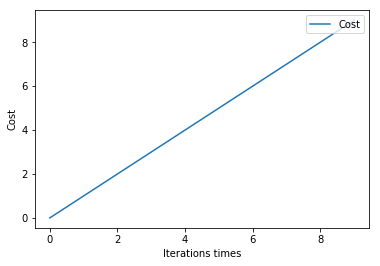

In [16]:
plot_learning_curve(np.arange(10))